## Imports

In [42]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## About the Data

**Your goal is to predict the operating condition of a waterpoint for each record in the dataset.**
 
- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- num_private -
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint

In [43]:
train_values = pd.read_csv("data/train_set_values.csv")
train_labels = pd.read_csv("data/train_set_labels.csv")

train_df = pd.merge(train_values, train_labels, on="id")
print(train_df.shape)
train_df.head()

(59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [44]:
train_df["population"].value_counts()

population
0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
605         1
1164        1
3620        1
2570        1
1422        1
Name: count, Length: 1049, dtype: int64

In [45]:
loc_cols = ["district_code", "ward"]


# Invalid coordinates
bad_lat = -2.000000e-08
bad_lon = 0.000000

mask = (train_df["latitude"] == bad_lat) & (train_df["longitude"] == bad_lon)
group_means = (
    train_df.loc[~mask]  # exclude bad values
    .groupby(loc_cols)[["latitude", "longitude"]]
    .mean()
    .reset_index()
)

In [46]:
group_means

,district_code,ward,latitude,longitude
0,0,Gode Gode,-6.551704,36.543537
1,0,Matomondo,-6.437563,36.692676
2,1,Arri,-4.226145,35.591610
3,1,Bashinet,-4.226084,35.408586
4,1,Berega,-6.163596,37.119465
...,...,...,...,...
2169,63,Nanyumbu,-11.161160,38.494923
2170,63,Napacho,-11.088254,38.189836
2171,63,Sengenya,-10.883227,38.341250
2172,67,Kiegeani,-7.971318,39.740153


In [47]:
train_df["permit"].value_counts()

permit
True     38852
False    17492
Name: count, dtype: int64

In [48]:
train_df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [49]:
train_df["public_meeting"].value_counts()

public_meeting
True     51011
False     5055
Name: count, dtype: int64

In [50]:
train_df["funder"].fillna(train_df["funder"].mode().values[0], inplace=True)

/tmp/ipykernel_28544/1523082221.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["funder"].fillna(train_df["funder"].mode().values[0], inplace=True)


In [51]:
train_df[train_df["longitude"] == 0][["latitude", "longitude"]]

,latitude,longitude
21,-2.000000e-08,0.0
53,-2.000000e-08,0.0
168,-2.000000e-08,0.0
177,-2.000000e-08,0.0
253,-2.000000e-08,0.0
...,...,...
59189,-2.000000e-08,0.0
59208,-2.000000e-08,0.0
59295,-2.000000e-08,0.0
59324,-2.000000e-08,0.0


In [52]:
train_df["installer"].value_counts()

installer
DWE                     17402
Government               1825
RWE                      1206
Commu                    1060
DANIDA                   1050
                        ...  
Rilayo water project        1
Sent Tho                    1
UPM                         1
Magul                       1
Magoma ADP                  1
Name: count, Length: 2145, dtype: int64

In [53]:
train_df[["funder", "installer"]]

,funder,installer
0,Roman,Roman
1,Grumeti,GRUMETI
2,Lottery Club,World vision
3,Unicef,UNICEF
4,Action In A,Artisan
...,...,...
59395,Germany Republi,CES
59396,Cefa-njombe,Cefa
59397,Government Of Tanzania,NaN
59398,Malec,Musa


## Target

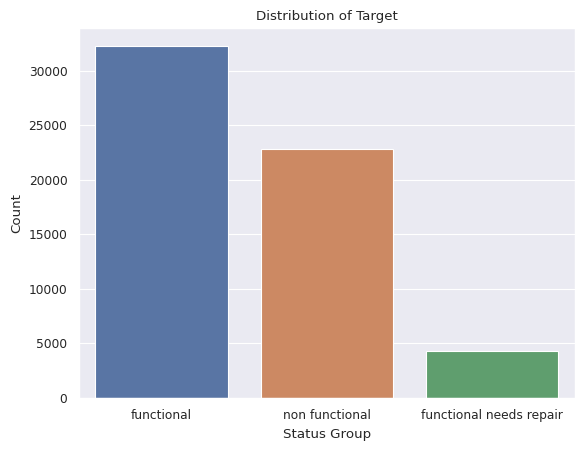

In [54]:
target_vcs = train_df["status_group"].value_counts()

sns.set_theme('paper')
sns.barplot(x=target_vcs.keys(), y=target_vcs, hue=target_vcs.keys())
plt.title("Distribution of Target")
plt.xlabel("Status Group")
plt.ylabel("Count")
plt.show()

**Inference:** The target value is skewed with 'functional needs repair' having the lest amount of samples. Techniques to handle imbalanced data will be required -> Oversampling, undersampling, weightage.

In [55]:
train_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [56]:
top_n = 5
vcs = train_df["source"].value_counts()
top_vcs = vcs.head(top_n)
replace_w_other = lambda x: x if x in top_vcs.index else 'Other'
train_df["source"] = train_df["source"].apply(replace_w_other)
train_df.source.value_counts()

source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
Other                    2573
rainwater harvesting     2295
Name: count, dtype: int64

In [57]:
dummies = pd.get_dummies(train_df.source, prefix="source_", drop_first=True)
dummies.head()


,source__machine dbh,source__rainwater harvesting,source__river,source__shallow well,source__spring
0,False,False,False,False,True
1,False,True,False,False,False
2,False,False,False,False,False
3,True,False,False,False,False
4,False,True,False,False,False


In [58]:
train_df = pd.concat([train_df, dummies], axis=1)
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,source__machine dbh,source__rainwater harvesting,source__river,source__shallow well,source__spring
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,False,False,False,False,True
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,False,True,False,False,False
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,Other,dam,surface,communal standpipe multiple,communal standpipe,functional,False,False,False,False,False
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,True,False,False,False,False
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,False,True,False,False,False


In [65]:
numerical_cols = ["amount_tsh", "gps_height", "longitude", "latitude", "population", "num_private"]
categorical_cols = ["funder", "installer", "wpt_name", "basin", "subvillage", "region", "region_code", "district_code", "lga", "ward", "public_meeting", "scheme_management", "scheme_name", "permit", "extraction_type", "extraction_type_group", "extraction_type_class", "management", "management_group", "payment", "payment_type", "water_quality", "quality_group", "quantity", "quantity_group", "source", "source_type", "source_class", "waterpoint_type", "waterpoint_type_group", "recorded_by"]
date_cols = ['construction_year', 'date_recorded']
target = "status_group"
remaining_cols = set(train_df.columns) - set(numerical_cols) - set(categorical_cols) - set(date_cols) - set([target])
print(remaining_cols)

{'id'}


## Distribution

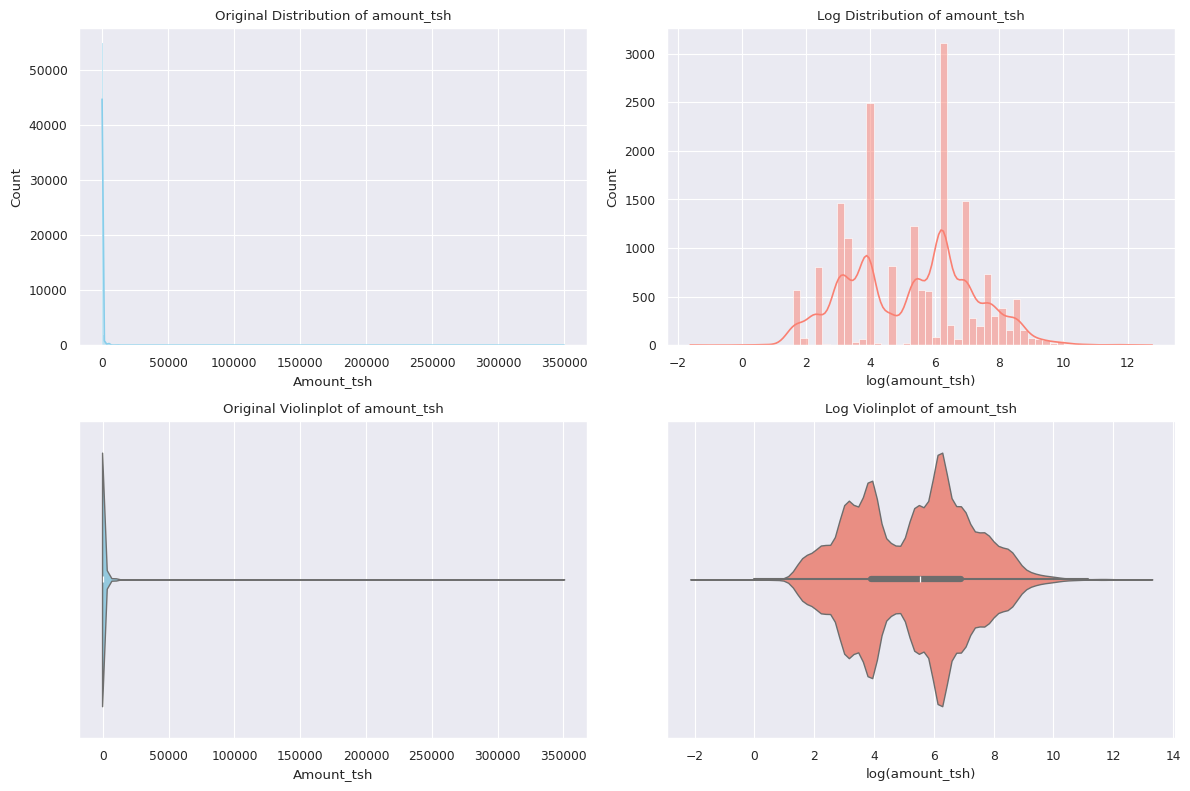

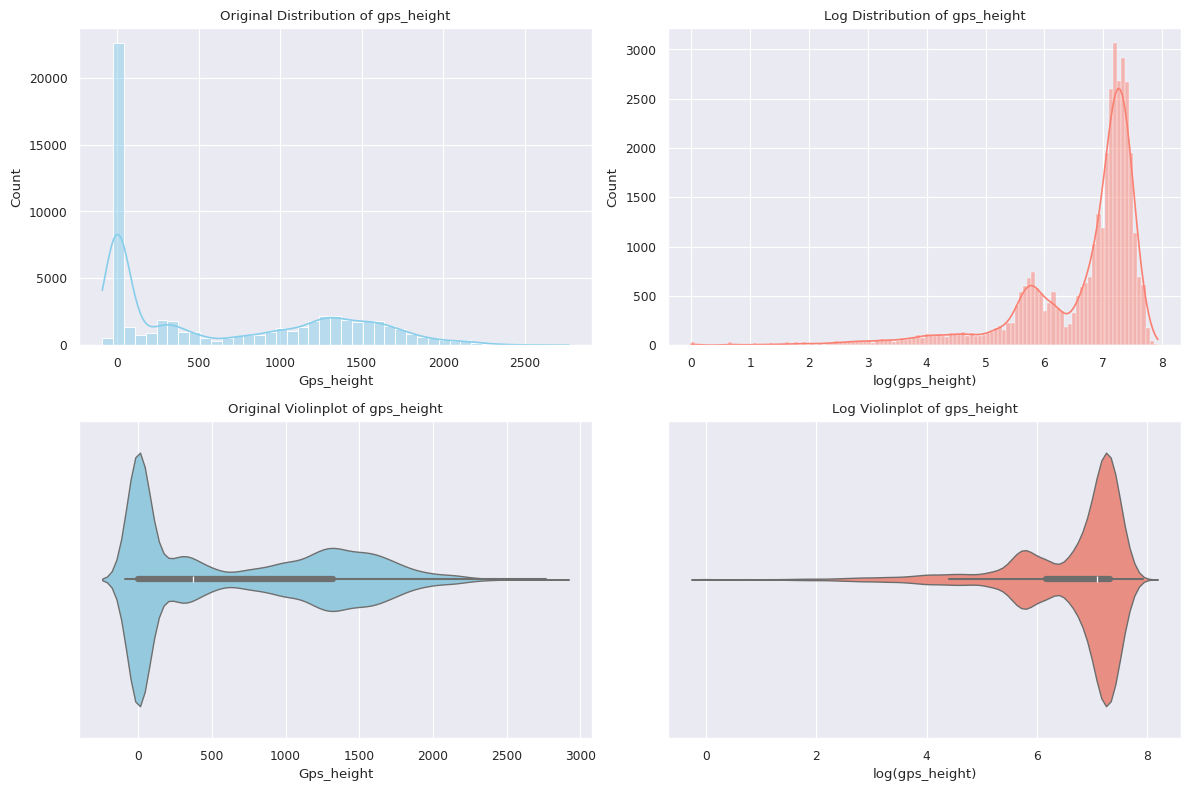

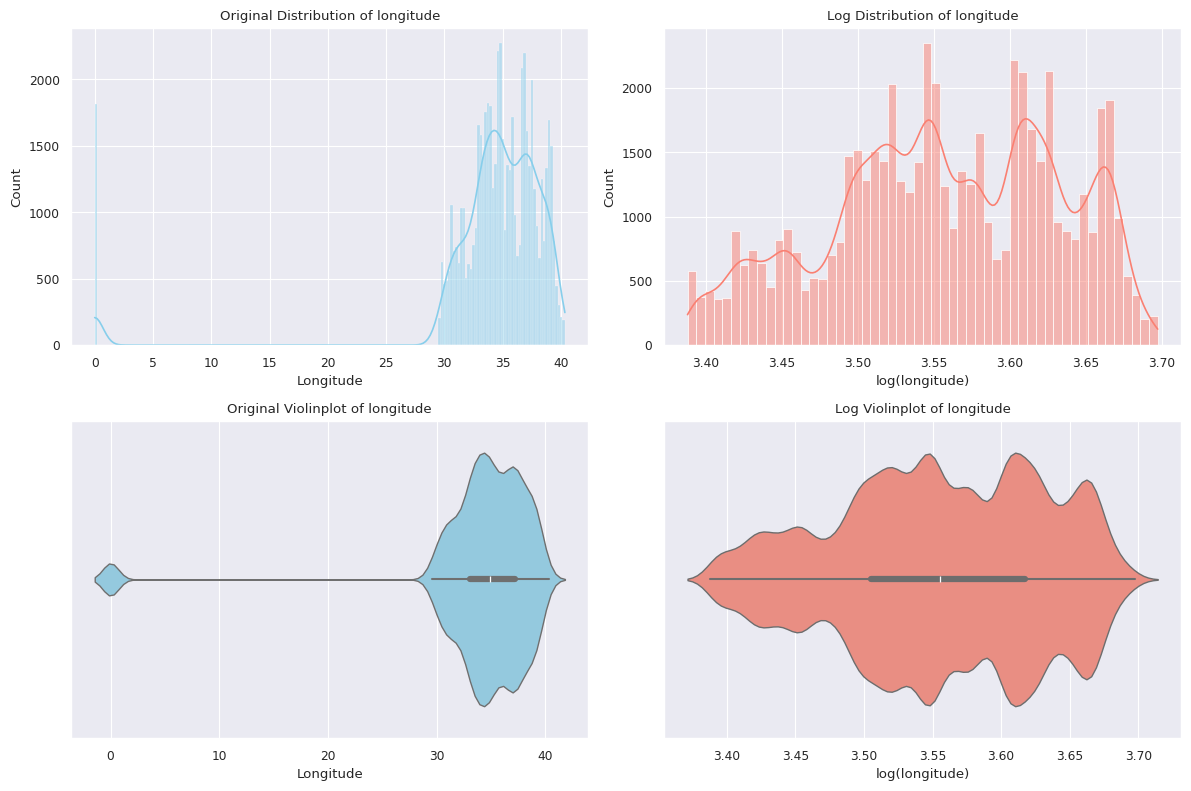

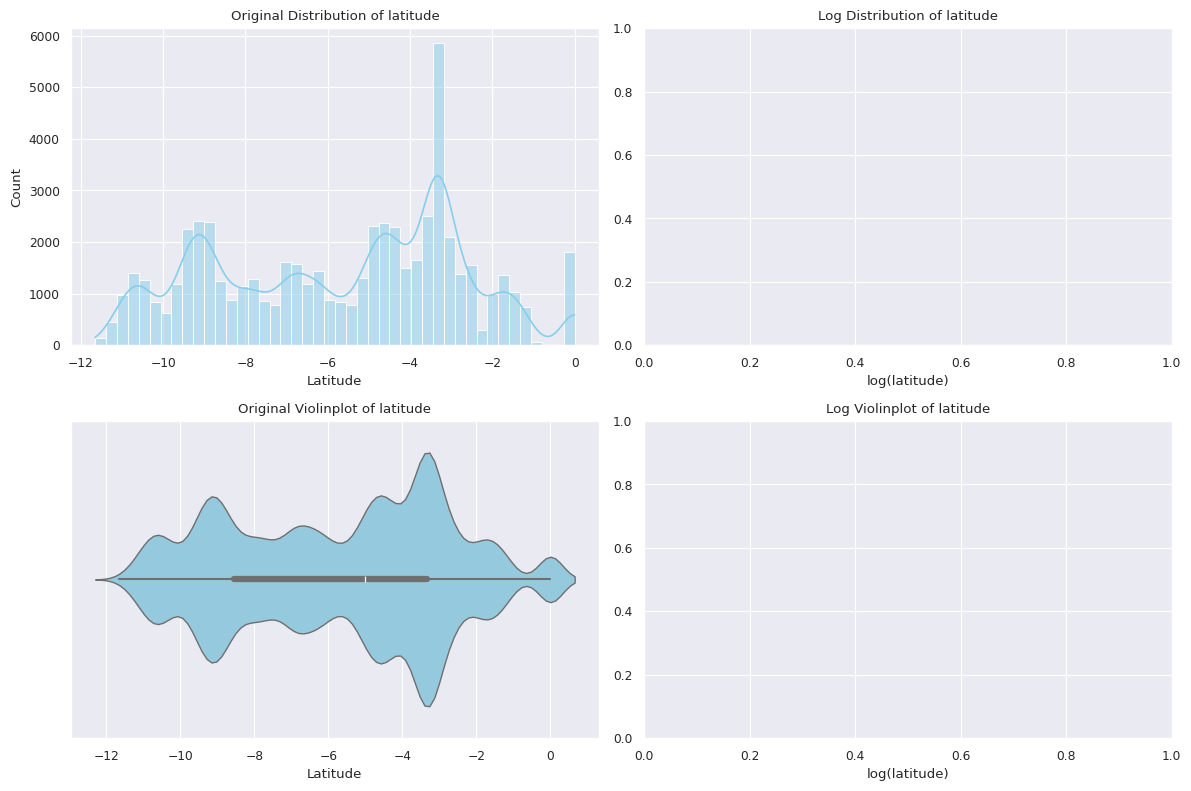

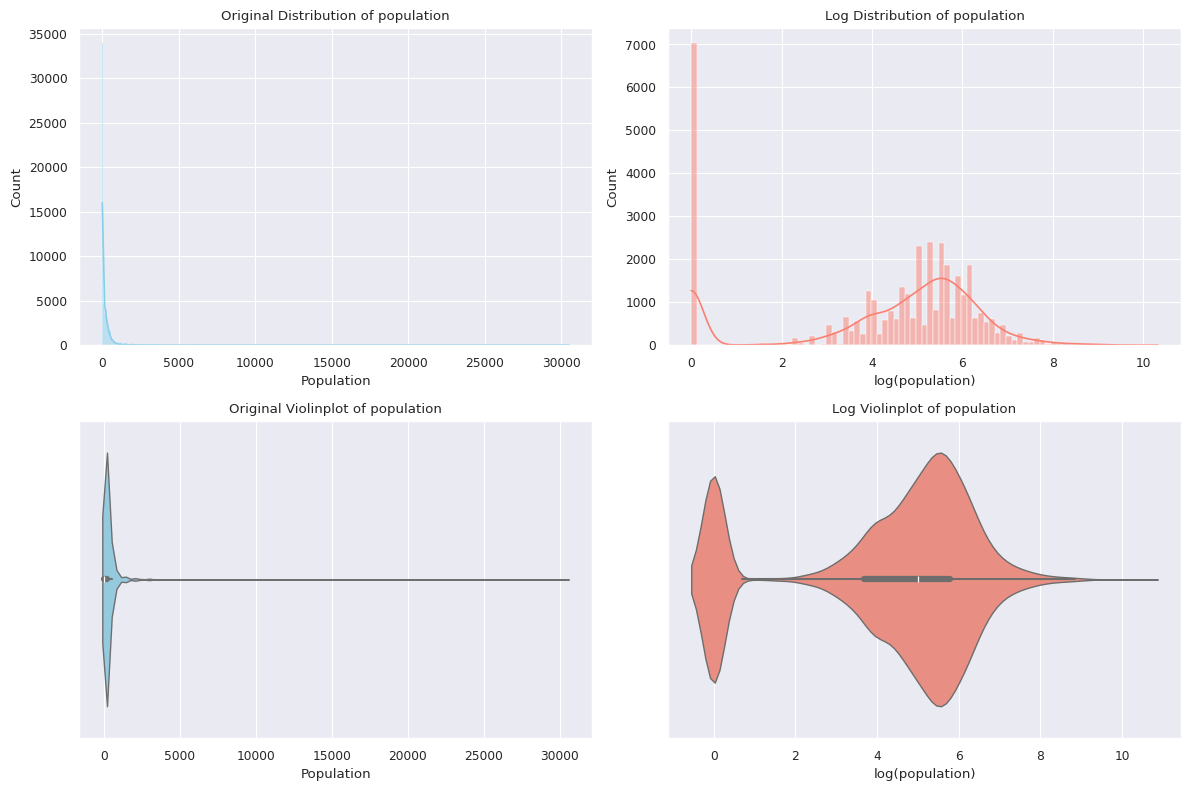

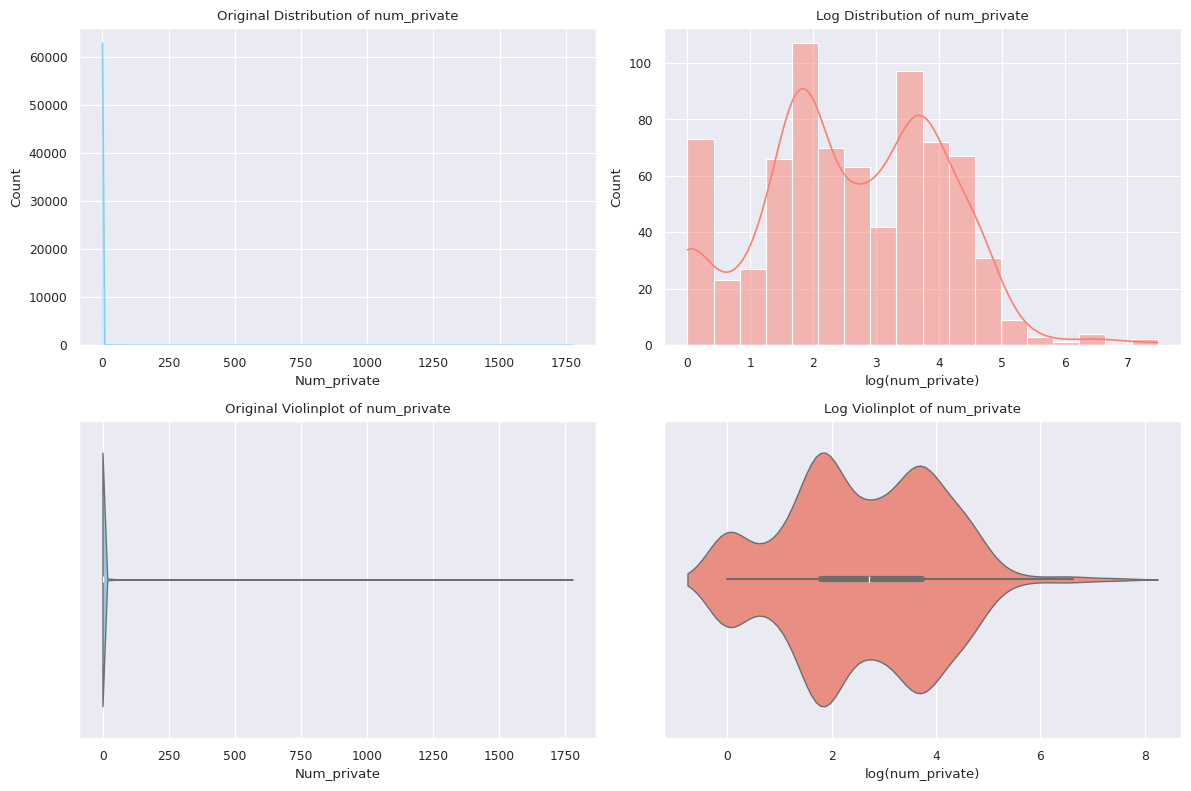

In [66]:

for col in numerical_cols:
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))  

    # Original Histogram
    sns.histplot(train_df[col], kde=True, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title(f"Original Distribution of {col}")
    axes[0, 0].set_xlabel(col.capitalize())

    # Log Histogram (only positive values)
    sns.histplot(np.log(train_df[train_df[col] > 0][col]), kde=True, ax=axes[0, 1], color='salmon')
    axes[0, 1].set_title(f"Log Distribution of {col}")
    axes[0, 1].set_xlabel(f"log({col})")

    # Original Violinplot
    sns.violinplot(x=train_df[col], ax=axes[1, 0], color='skyblue')
    axes[1, 0].set_title(f"Original Violinplot of {col}")
    axes[1, 0].set_xlabel(col.capitalize())

    # Log Violinplot (only positive values)
    sns.violinplot(x=np.log(train_df[train_df[col] > 0][col]), ax=axes[1, 1], color='salmon')
    axes[1, 1].set_title(f"Log Violinplot of {col}")
    axes[1, 1].set_xlabel(f"log({col})")

    plt.tight_layout()
    plt.show()

- amount_tsh: lots of values near 0: log transform
- gps_height: lots of values near 0: not right so fix with median?
- lat and long: fix 0 values with region with external api
- population: fix 0 (why would you build well near 0 population): also log transform
- num_private: no info in website so idk

/tmp/ipykernel_3155/1970286669.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vcs.values, y=top_vcs.index, palette="viridis")


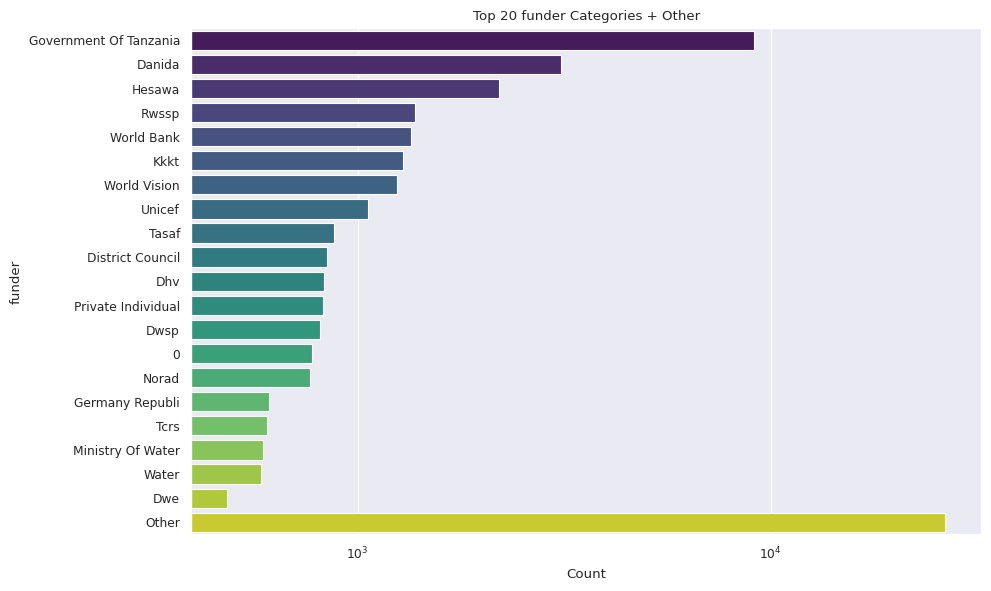

/tmp/ipykernel_3155/1970286669.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vcs.values, y=top_vcs.index, palette="viridis")


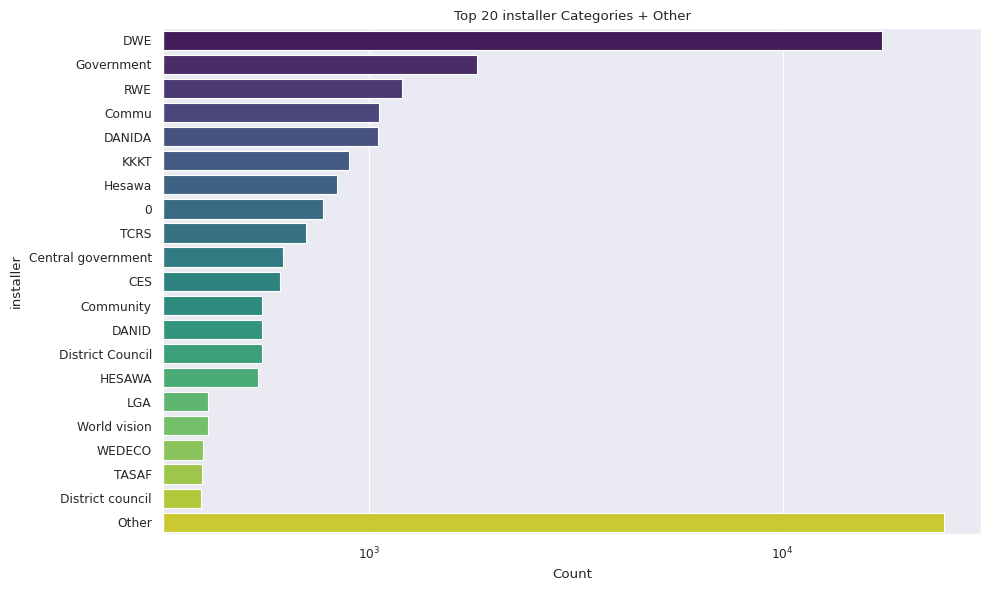

/tmp/ipykernel_3155/1970286669.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vcs.values, y=top_vcs.index, palette="viridis")


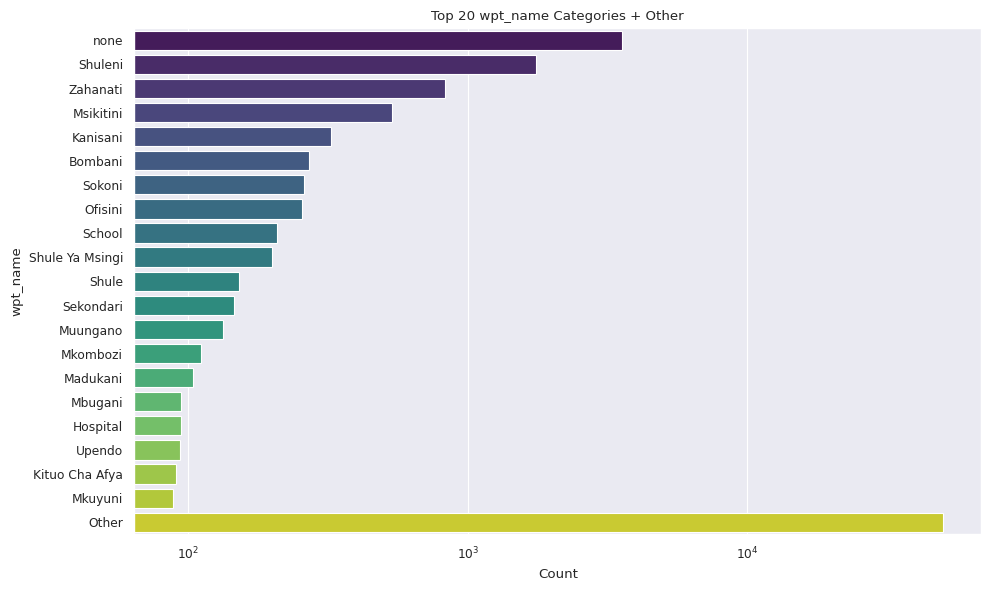

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


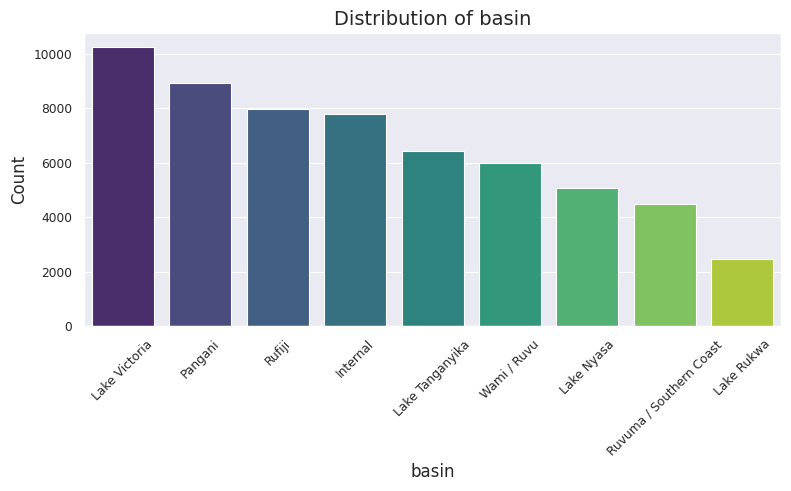

/tmp/ipykernel_3155/1970286669.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vcs.values, y=top_vcs.index, palette="viridis")


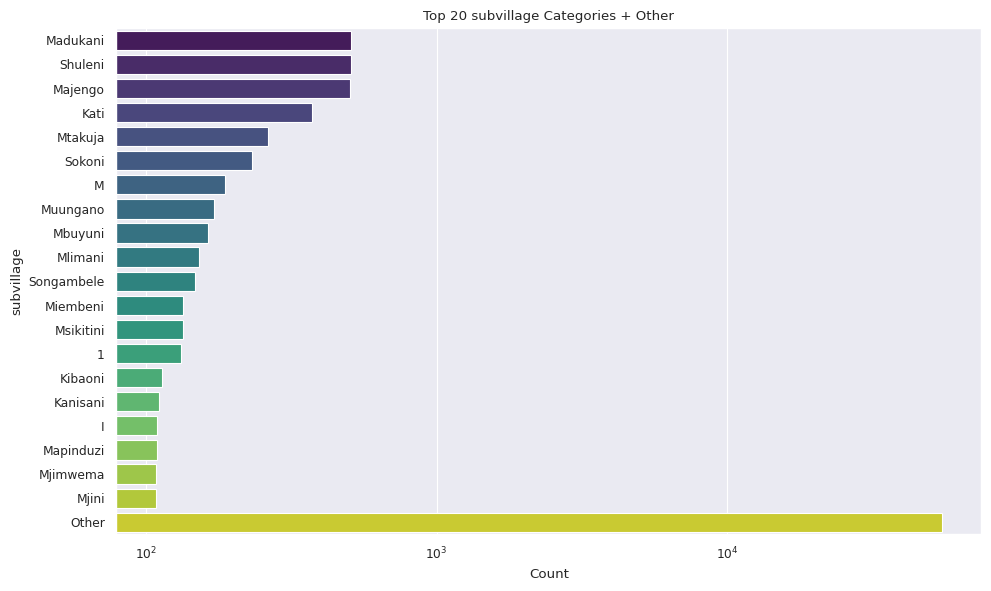

/tmp/ipykernel_3155/1970286669.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vcs.values, y=top_vcs.index, palette="viridis")


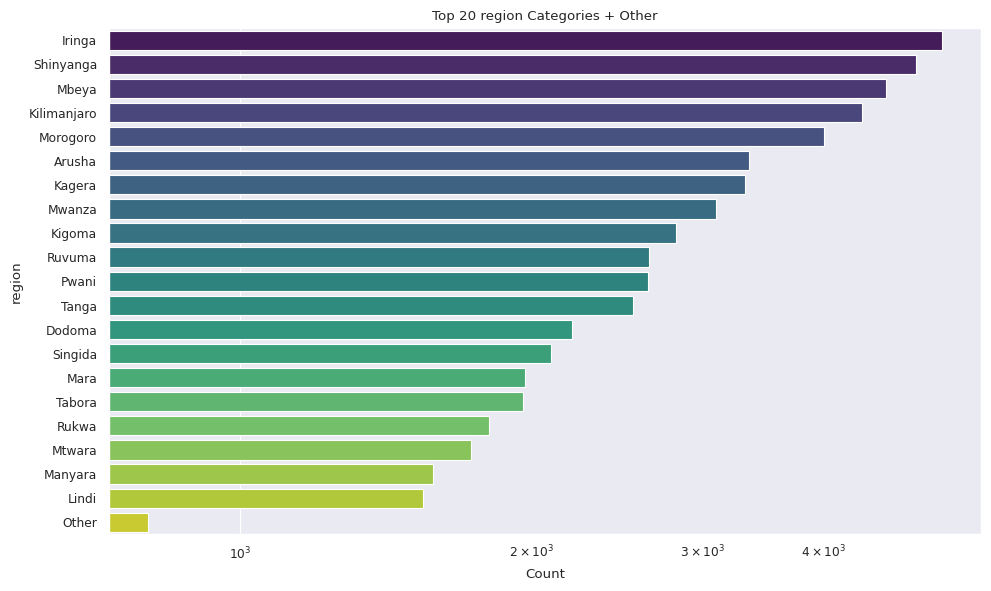

/tmp/ipykernel_3155/1970286669.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vcs.values, y=top_vcs.index, palette="viridis")


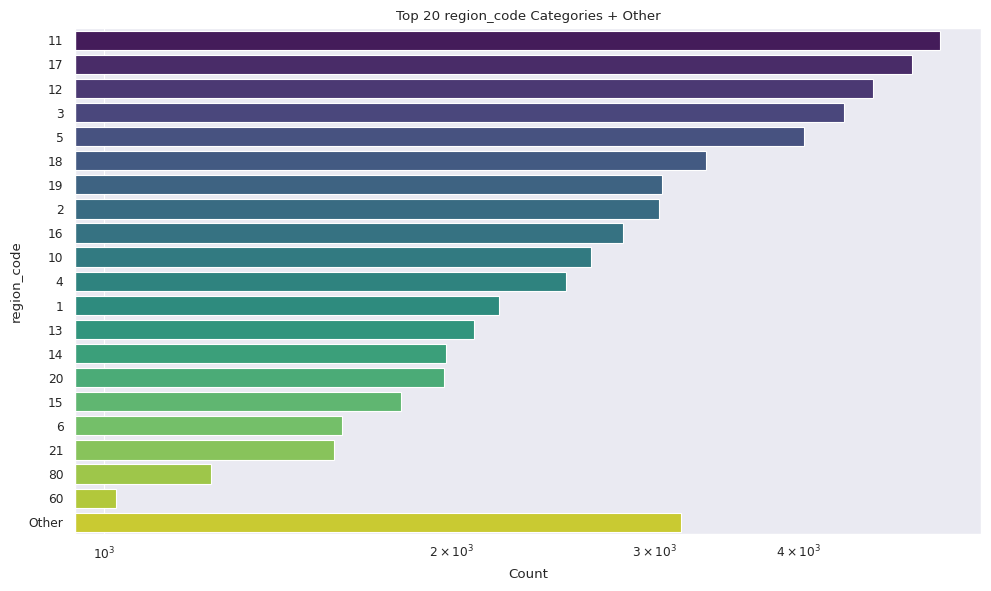

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


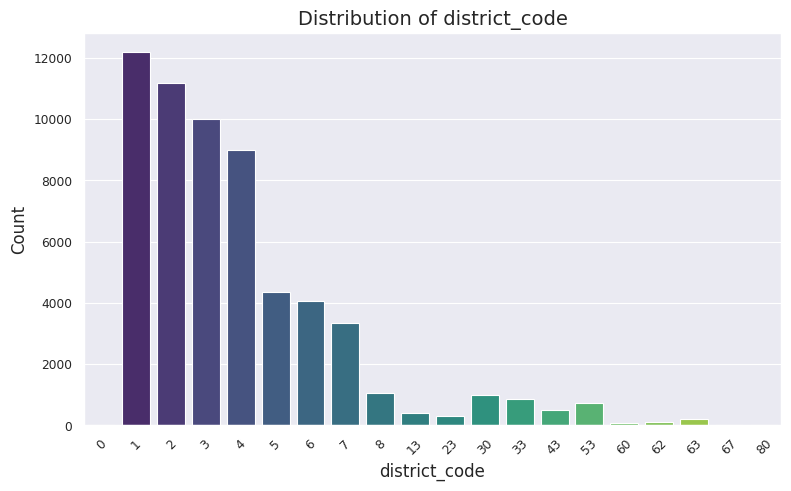

/tmp/ipykernel_3155/1970286669.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vcs.values, y=top_vcs.index, palette="viridis")


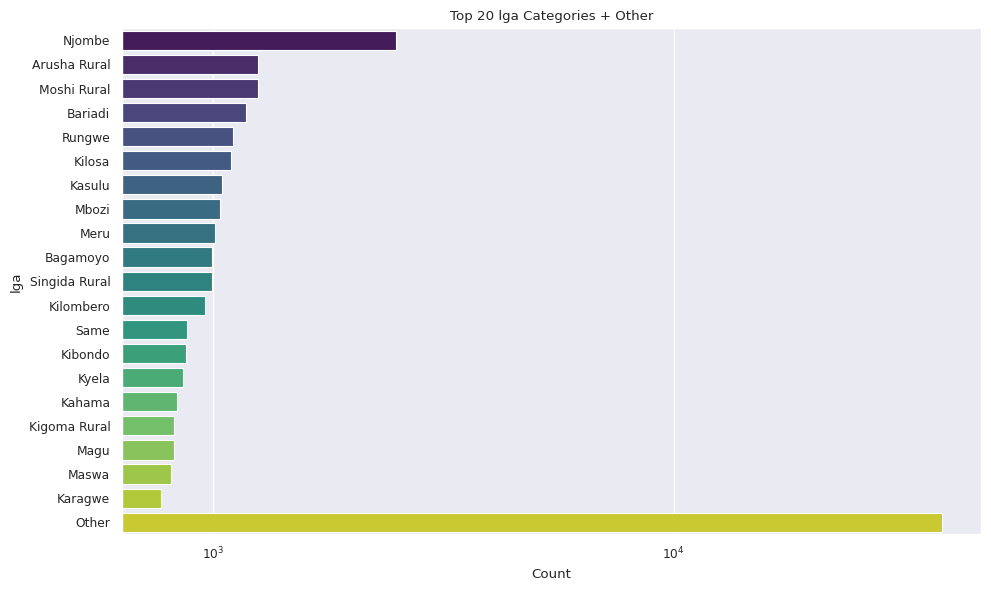

/tmp/ipykernel_3155/1970286669.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vcs.values, y=top_vcs.index, palette="viridis")


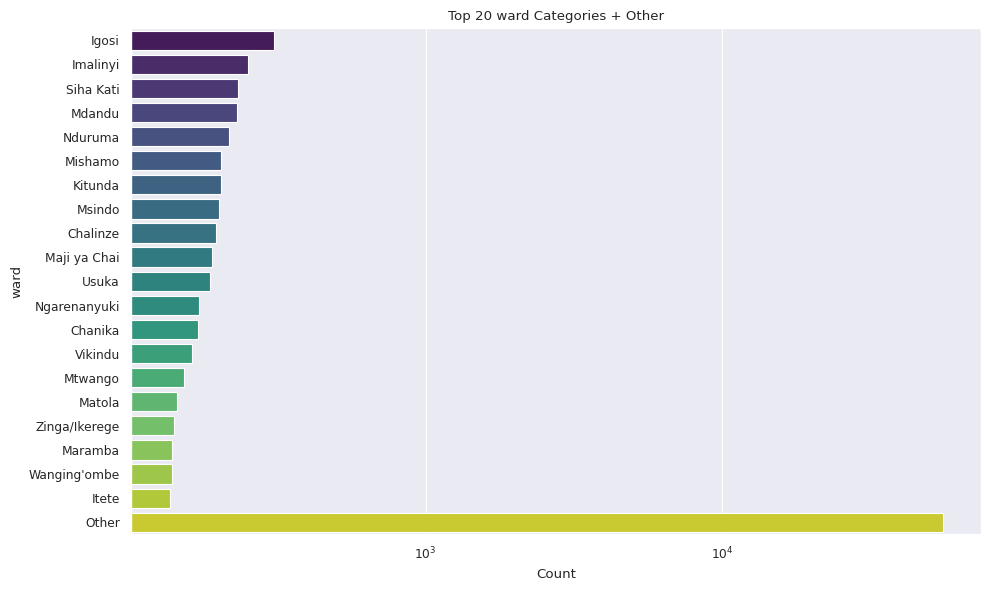

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


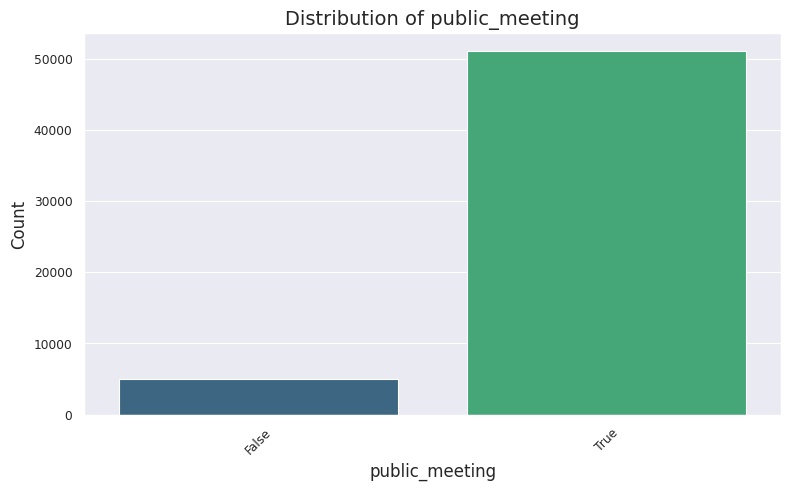

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


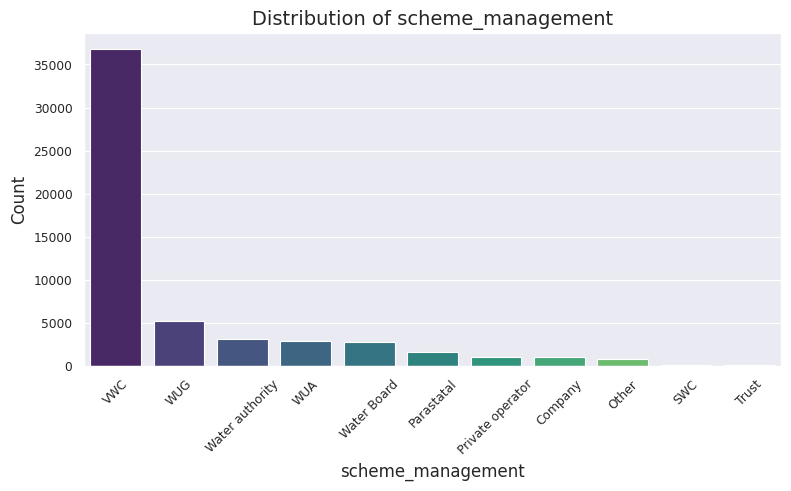

/tmp/ipykernel_3155/1970286669.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vcs.values, y=top_vcs.index, palette="viridis")


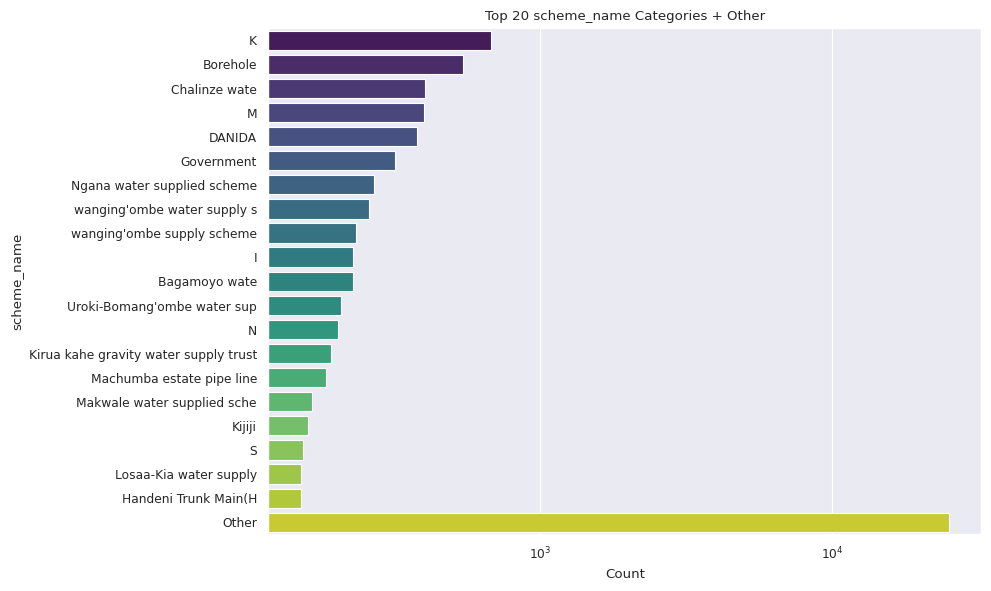

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


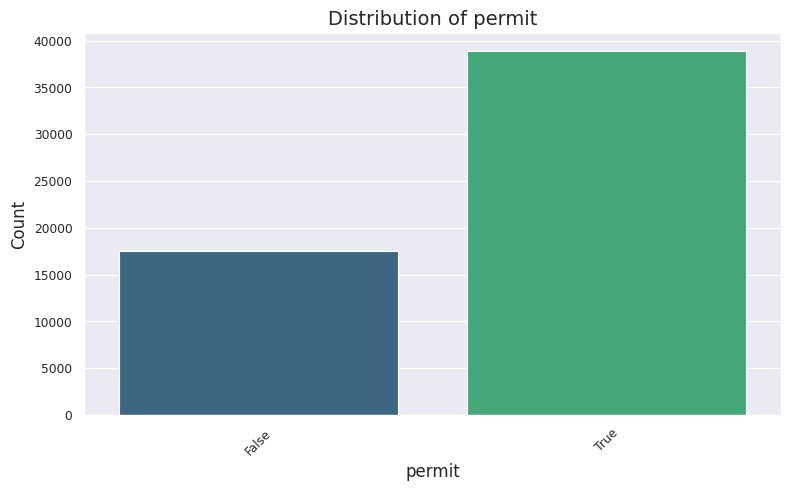

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


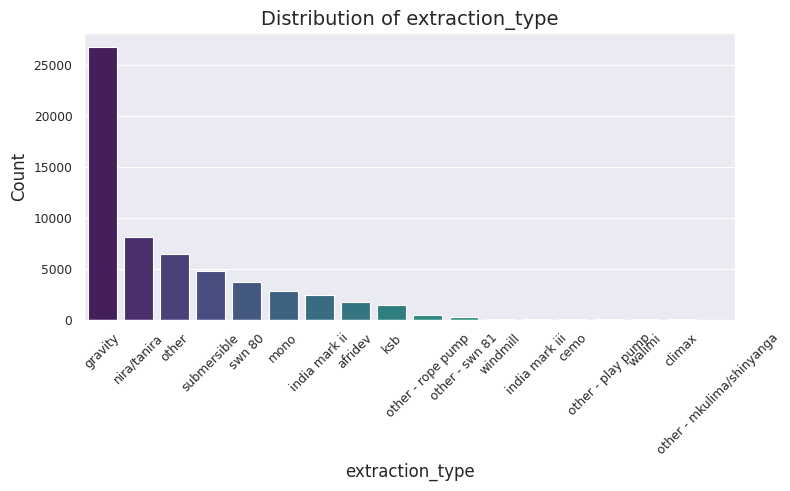

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


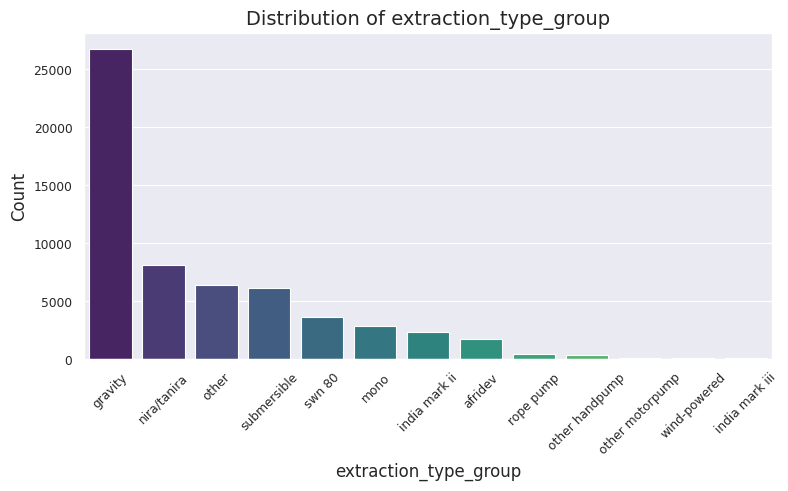

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


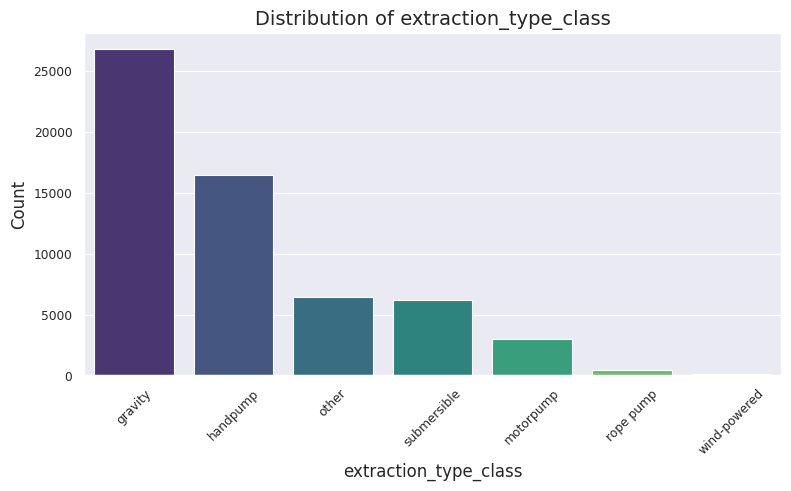

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


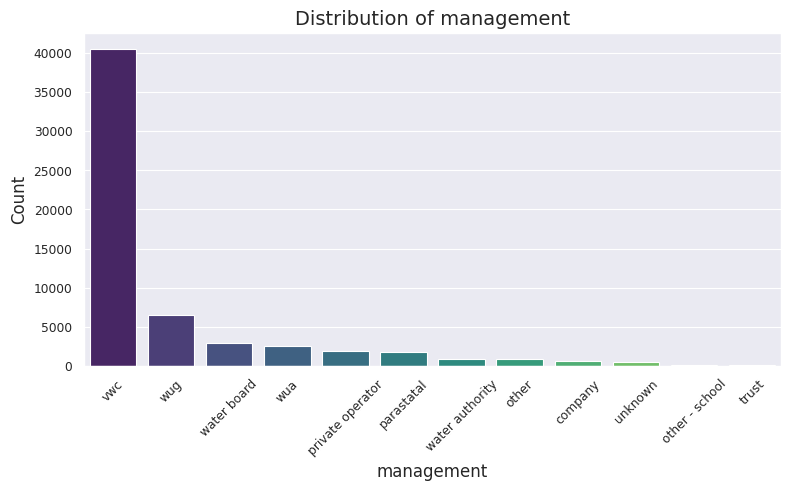

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


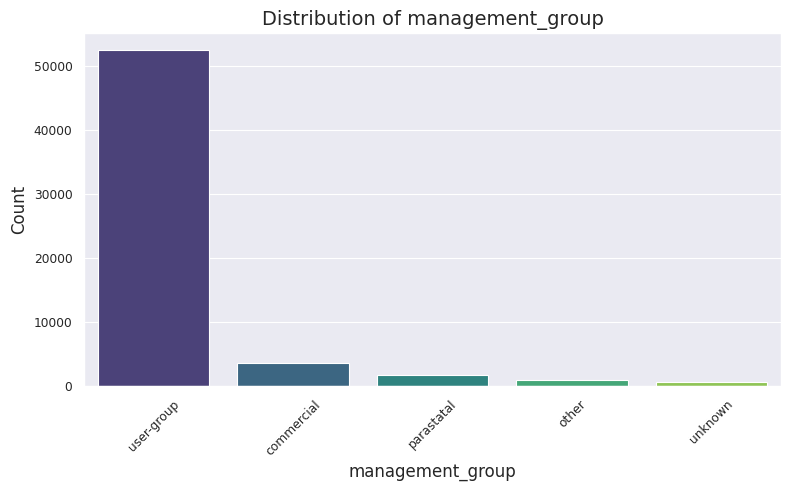

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


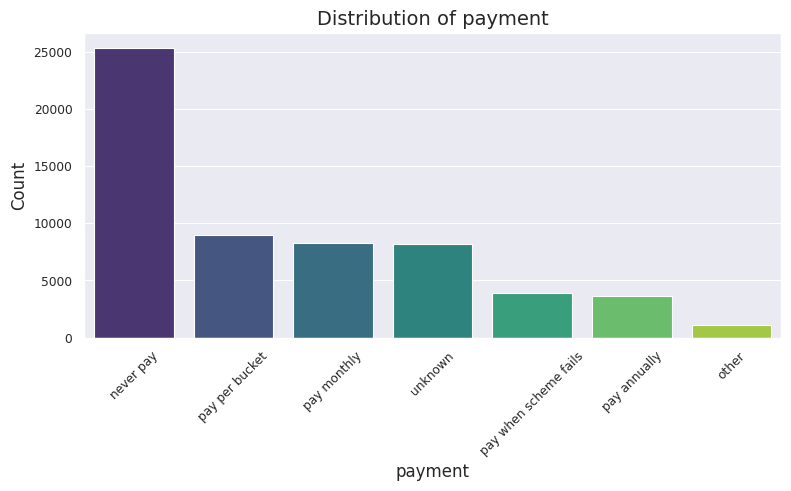

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


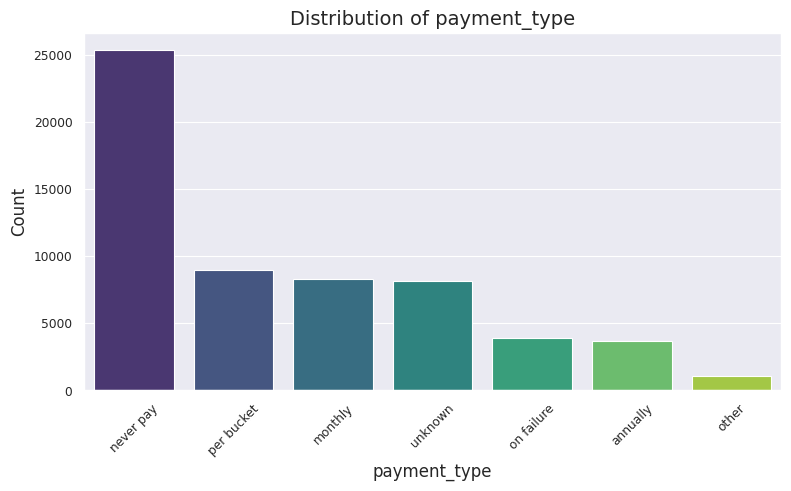

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


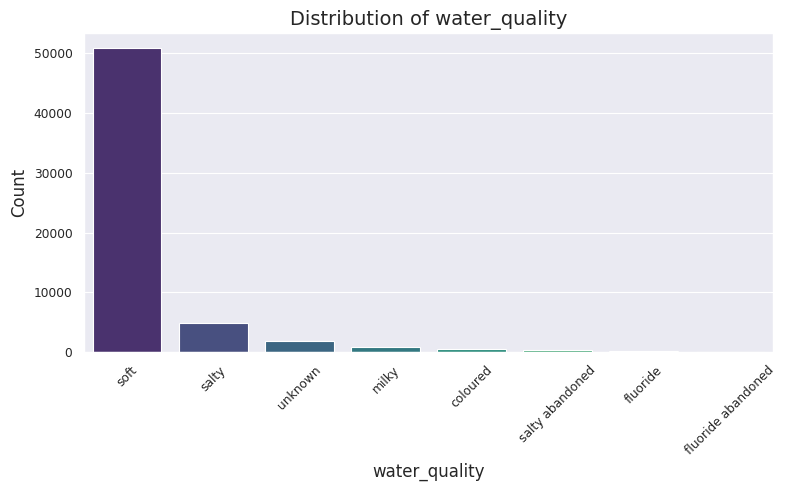

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


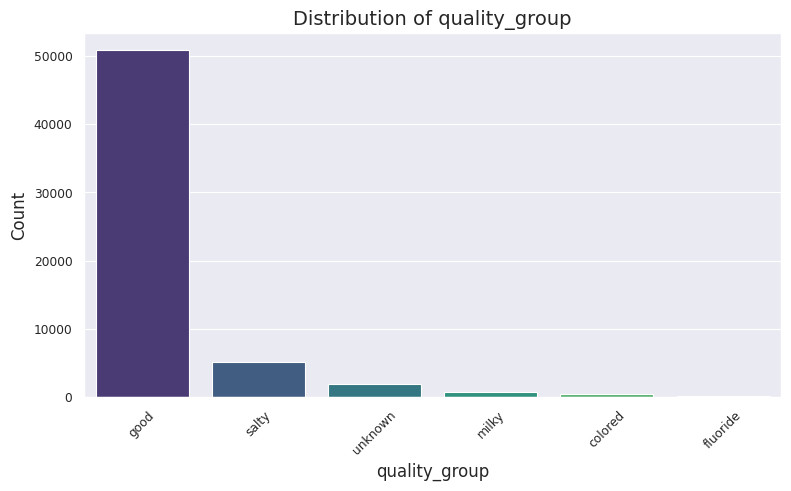

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


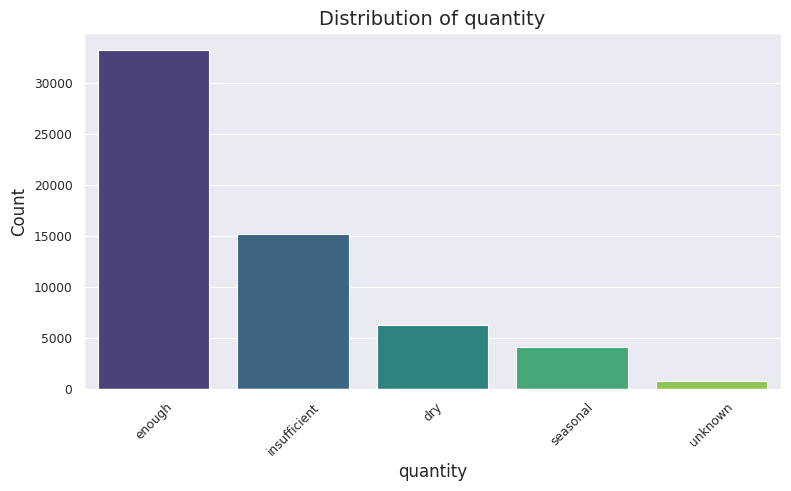

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


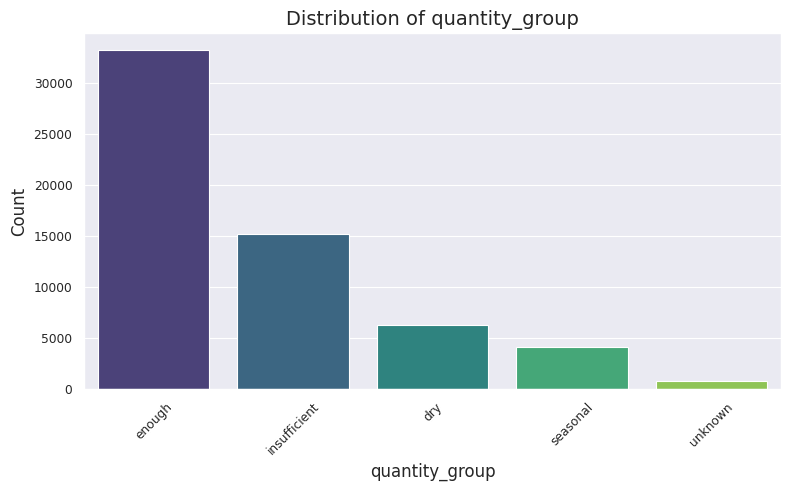

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


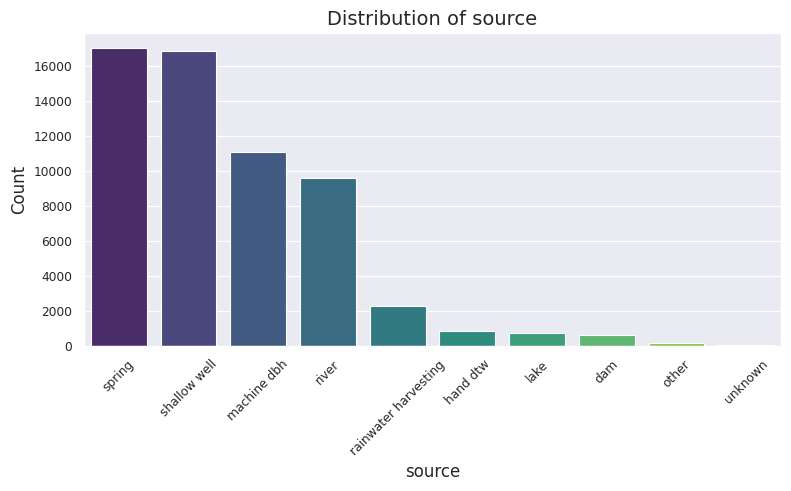

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


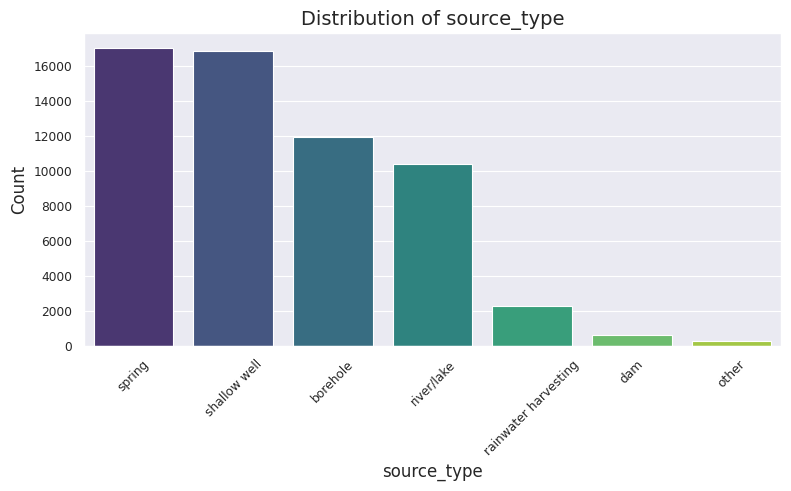

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


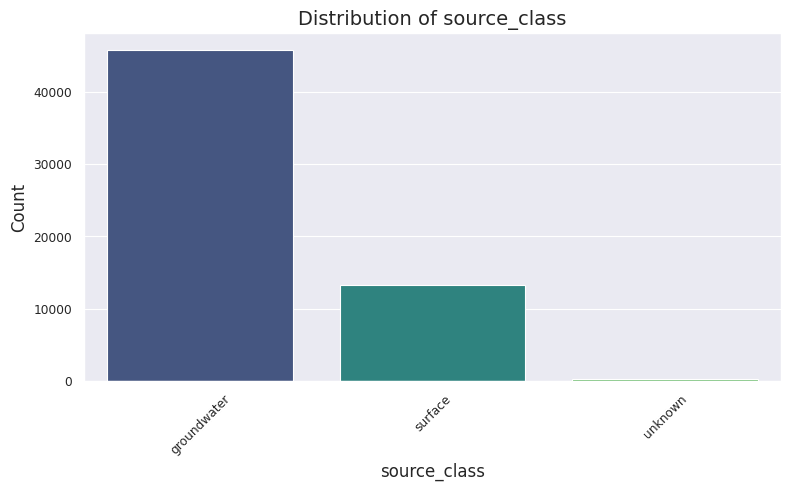

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


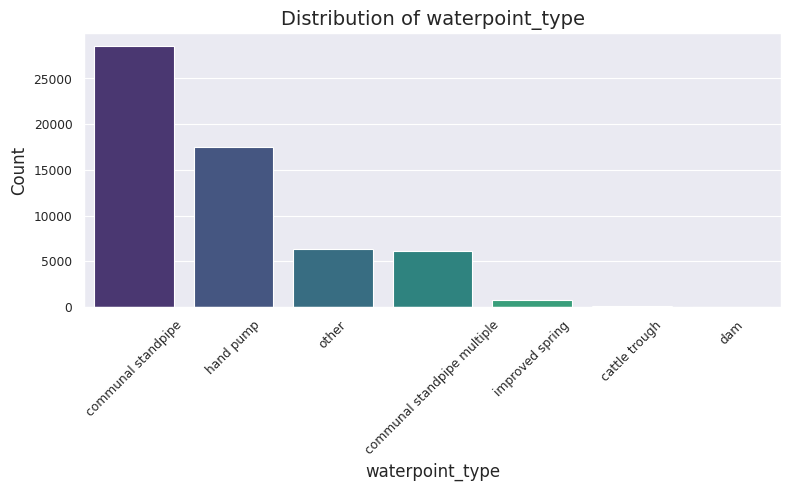

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


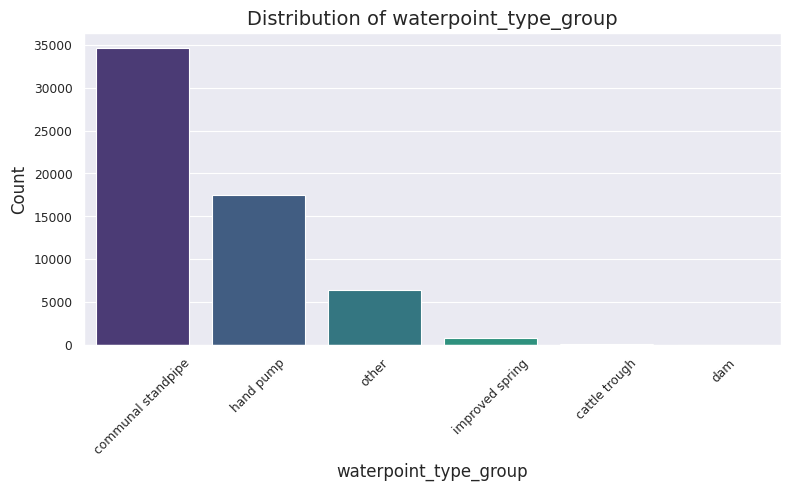

/tmp/ipykernel_3155/1970286669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")


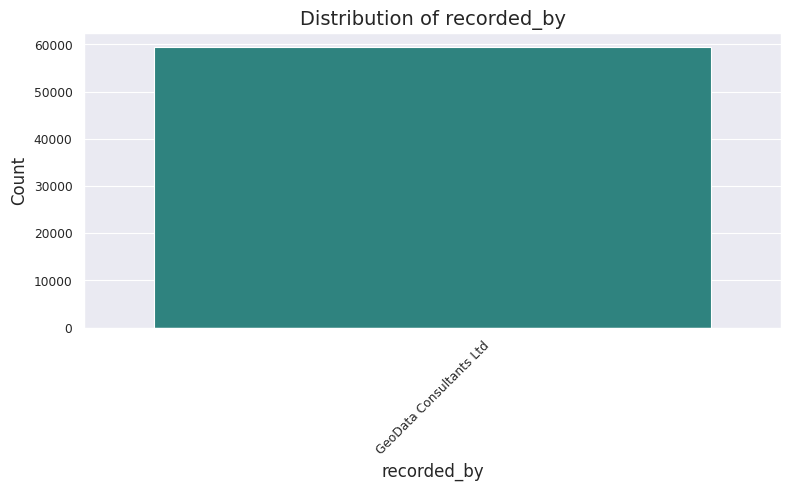

In [ ]:

top_n = 20  # for many-category columns

for col in categorical_cols:
    n_unique = train_df[col].nunique()
    
    if n_unique <= 20:
        # Simple vertical bar plot
        plt.figure(figsize=(8, 5))
        vcs = train_df[col].value_counts().sort_values(ascending=False)
        sns.barplot(x=vcs.index, y=vcs.values, palette="viridis")
        plt.xticks(rotation=45, ha="center")
        plt.title(f"Distribution of {col}", fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plt.tight_layout()
        plt.show()
        
    else:
        # Many categories → horizontal bar plot, top N + "Other"
        vcs = train_df[col].value_counts()
        top_vcs = vcs.head(top_n)
        others_sum = vcs.iloc[top_n:].sum()
        top_vcs['Other'] = others_sum
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_vcs.values, y=top_vcs.index, palette="viridis")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.title(f"Top {top_n} {col} Categories + Other")
        plt.xscale("log")  # log scale for better visibility of small counts
        plt.tight_layout()
        plt.show()

- Lots of categories (collapse into other): >= 20?
- Locations (only use lat and long): subvillage, region, region_code, district_code, lga, ward, 

In [19]:
train_df["latitude"].value_counts()

latitude
-2.000000e-08    1812
-2.467137e+00       2
-2.476680e+00       2
-7.065373e+00       2
-2.465246e+00       2
                 ... 
-8.234989e+00       1
-3.268579e+00       1
-1.146053e+01       1
-5.424405e+00       1
-5.106121e+00       1
Name: count, Length: 57517, dtype: int64

In [32]:
train_df["longitude"].value_counts()

longitude
0.000000     1812
37.542785       2
32.982698       2
32.977191       2
39.101244       2
             ... 
36.626541       1
37.333530       1
38.970078       1
34.772053       1
39.096796       1
Name: count, Length: 57516, dtype: int64

In [18]:
train_df[["latitude", "longitude"]].value_counts()

latitude       longitude
-2.000000e-08  0.000000     1812
-6.981326e+00  39.101244       2
-2.528716e+00  32.972719       2
-2.510639e+00  32.993277       2
-6.981830e+00  39.090880       2
                            ... 
-7.447938e+00  35.479877       1
-7.447625e+00  36.920208       1
-7.447557e+00  36.920273       1
-7.447491e+00  31.416684       1
-7.451866e+00  35.481256       1
Name: count, Length: 57520, dtype: int64

In [ ]:
-2.000000e-08

In [38]:
loc_cols = ["subvillage", "region", "region_code", "district_code", "lga", "ward"]


# Define bad values
bad_lat = -2.000000e-08
bad_lon = 0.000000

# Mask for rows with invalid coordinates
mask = (train_df["latitude"] == bad_lat) & (train_df["longitude"] == bad_lon)

# Compute group-wise means (ignoring bad values)
group_means = (
    train_df.loc[~mask]  # exclude bad values
    .groupby(loc_cols)[["latitude", "longitude"]]
    .mean()
    .reset_index()
)

# Merge means back into original df
train_df = train_df.merge(group_means, on=loc_cols, how="left", suffixes=("", "_mean"))

# Replace only invalid coords with group means
train_df.loc[mask, "latitude"] = train_df.loc[mask, "latitude_mean"]
train_df.loc[mask, "longitude"] = train_df.loc[mask, "longitude_mean"]

# Drop helper columns
train_df.drop(columns=["latitude_mean", "longitude_mean"], inplace=True)

In [40]:
train_df[["latitude", "longitude"]].value_counts()

latitude   longitude
-2.985304  34.322798    3
-2.465246  32.924886    2
-6.980216  39.096499    2
-6.965834  37.542785    2
-2.515321  32.978062    2
                       ..
-7.447938  35.479877    1
-7.447625  36.920208    1
-7.447557  36.920273    1
-7.447491  31.416684    1
-7.451866  35.481256    1
Name: count, Length: 57520, dtype: int64

## Date

In [90]:
train_df[date_cols].head()

,construction_year,date_recorded
0,1999,2011-03-14
1,2010,2013-03-06
2,2009,2013-02-25
3,1986,2013-01-28
4,0,2011-07-13


- One obvious feature is how long ago was the pump constructed

In [91]:
train_df["construction_year"].value_counts()[:10]

construction_year
0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
Name: count, dtype: int64

- But most pumps do not have recorded construction date
- We can use median imputer per region and management

In [92]:
# Replace 0 with NaN
train_df['construction_year'] = train_df['construction_year'].replace(0, np.nan)

# Group medians (some groups may still become NaN if all values were 0)
group_medians = (
    train_df.groupby(['region', 'management'])['construction_year']
    .transform('median')
)

# Fill missing with group median first
train_df['construction_year'] = train_df['construction_year'].fillna(group_medians)

# Fill any remaining NaNs with global median
global_median = train_df['construction_year'].median()
train_df['construction_year'] = train_df['construction_year'].fillna(global_median)

In [97]:
train_df[date_cols].isna().sum()

construction_year    0
date_recorded        0
dtype: int64

In [98]:
train_df[date_cols].head()

,construction_year,date_recorded
0,1999.0,2011-03-14
1,2010.0,2013-03-06
2,2009.0,2013-02-25
3,1986.0,2013-01-28
4,2000.0,2011-07-13


In [102]:
train_df["construction_year"].value_counts()

construction_year
2000    14972
2005     4754
1996     3399
2010     2665
2008     2625
2009     2548
2006     2002
2007     1626
2003     1302
2011     1256
1995     1228
2004     1139
2012     1087
2002     1075
1978     1037
1999      997
1990      990
1998      972
1985      946
2001      877
1980      811
1984      779
1982      744
1994      741
1972      714
1993      713
1974      680
1992      668
1997      657
1988      521
1986      504
1983      490
1975      437
1976      414
1970      411
1991      324
1989      317
1987      302
1981      238
1977      202
1979      192
1973      185
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: count, dtype: int64

In [100]:
train_df["construction_year"] = train_df["construction_year"].astype(int)

In [106]:
train_df["date_recorded"] = pd.to_datetime(train_df["date_recorded"], format="%Y-%m-%d")

In [107]:
train_df["age"] = train_df["construction_year"] - train_df["date_recorded"].dt.year

## Correlation

In [ ]:
train_df_encoded = train_df.copy(deep=True)

for col in categorical_cols  + [target]:
    train_df_encoded[col] = LabelEncoder().fit_transform(train_df_encoded[col])

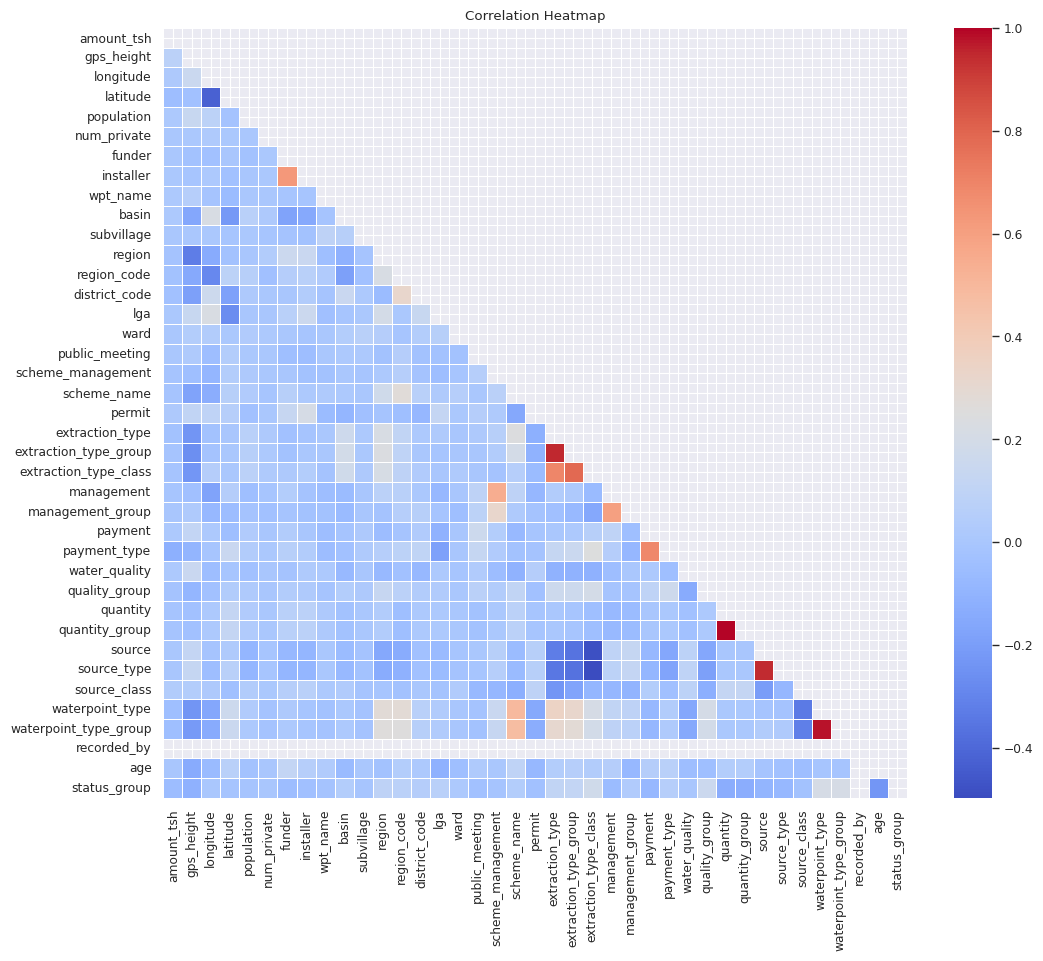

In [110]:
corr = train_df_encoded[numerical_cols + categorical_cols + ["age"] + [target]].corr()

plt.figure(figsize=(12, 10))

# Optional: mask upper triangle for cleaner look
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=False, cmap="coolwarm", mask=mask, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

- lat and long correlated: probably because of 0 values
- installer and funder: probably because the person who funds also installs
- extraction_type and extraction_type_group and extraction_type_class: basically the same thing with more granularity: only use one
- source/source_type correlated with all extraction: Maybe since soil is similar in the source -> we use the same extraction methodd?
- payment_type and payment
- management_group and management
- quality and quality_group
- source and source_type
- waterpoint_type and water_point_type_group
- very low correlation of all features with targer col